<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Reducing dimensionality with principal component analysis**

Estimated time needed: **20** minutes

This project is based on [IBM developer tutorial](https://developer.ibm.com/tutorials/awb-reducing-dimensionality-with-principal-component-analysis/) By Eda Kavlakoglu
<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0YXXEN/images/pca%20logo.jpg" width="600px" alt="image">
</center>
<br>


Principal component analysis (PCA) is a technique that reduces data dimensionality by transforming correlated variables into a smaller set of uncorrelated variables called principal components. This unsupervised learning method helps in data preprocessing by simplifying high-dimensional data, which reduces model complexity and combats issues like multicollinearity and overfitting. PCA is useful in enhancing data visualization and model performance, particularly in algorithms like linear and logistic regression. This overview focuses on standard PCA, although variations like kernel PCA exist.

In this guided project, you use Python to apply PCA on a popular [wine data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) set to demonstrate how to reduce dimensionality within the data set. Each wine sample in the data set is categorized into one of three classes (class 0, class 1, and class 2), which indicates the grape's origin. The goal is to optimize the classification of these wine classes using PCA. For more information on this data set, refer to the documentation on the [UCI ML repository](https://archive.ics.uci.edu/dataset/109/wine) where scikit-learn sourced this data.


---


# Objectives

After completing this lab you will be able to:

1. **Explore the Dataset**: Conduct an exploratory data analysis to understand the structure, variable types, and distributions within the wine dataset.

2. **Visualize Data**: Use pair plots, histograms, and correlation heatmaps to explore the correlations and distributions of the dataset's features.

3. **Split the Dataset**: Divide the dataset into training and test sets for subsequent modeling.

4. **Standardize Data**: Implement feature scaling to standardize the data, ensuring a mean of zero and a standard deviation of one, crucial for PCA.

5. **Determine Optimal `n_components` for PCA**: Use explained variance plots and scree plots to identify the ideal number of principal components.

6. **Apply PCA**: Reduce the dimensionality of the training data using PCA, focusing on retaining the most variance.

7. **Visualize PCA Output**: Create scatter plots to visualize the principal components and observe the separation between different wine types.

8. **Summary and Next Steps**: Conclude with insights gained from applying PCA and suggest future applications and improvements.


---


# Setup


### Installing Required Libraries


In [2]:
!pip install --upgrade seaborn

Once you have installed that, please **restart your kernel**. You can do that by navigating to the button shown below:

<center> <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/build-a-hotdog-not-hotdog-classifier-guided-project/images/Restarting_the_Kernel.png" width="60%" alt="Restart kernel"> </center>


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

---


# Load the Wine Quality data set


In [4]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
X = df.iloc[: ,:13]
y = df['target']

column_names = df.columns
column_names = column_names.to_list()

---


# Explore the data set

Before initiating data preprocessing, you should conduct an exploratory data analysis to understand the data's structure and format, including the types of variables, their distributions, and the overall organization of information. This helps you determine whether PCA is necessary to model the data.

You can start by understanding the shape of the data set, which lets you see that you have a 13-dimensional data set. You can explore further to see whether any of the features are correlated to one another, which indicates a potential need for dimensionality reduction.


In [5]:
df.shape

(178, 14)

Let's look at some samples rows from the dataset we loaded:


In [6]:
# Exercise
# randomely select 5 datapoints
df.sample(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
124    11.87        4.31  2.39               21.0       82.0           2.86   
49     13.94        1.73  2.27               17.4      108.0           2.88   
102    12.34        2.45  2.46               21.0       98.0           2.56   
147    12.87        4.61  2.48               21.5       86.0           1.70   
25     13.05        2.05  3.22               25.0      124.0           2.63   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
124        3.03                  0.21             2.91             2.80  0.75   
49         3.54                  0.32             2.08             8.90  1.12   
102        2.11                  0.34             1.31             2.80  0.80   
147        0.65                  0.47             0.86             7.65  0.54   
25         2.68                  0.47             1.92             3.58  1.13   

     od280/od315_of_diluted_wines  proline  target  
124                          3.64    380.0       1  
49                           3.10   1260.0       0  
102                          3.38    438.0       1  
147                          1.86    625.0       2  
25                           3.20    830.0       0

<details>
    <summary>Click here for Solution</summary>

```python
df.sample(5)
```

</details>


Some visualizations that you might want to use to explore the data include pair plots, histograms, and correlation heatmaps. Because this is a higher dimensional data set, some visualizations are more effective than others at highlighting correlations between variables.


---


# Pair plots
Given the number of dimensions in this data set, pair plots might not be the most effective visualization to identify correlations between data.


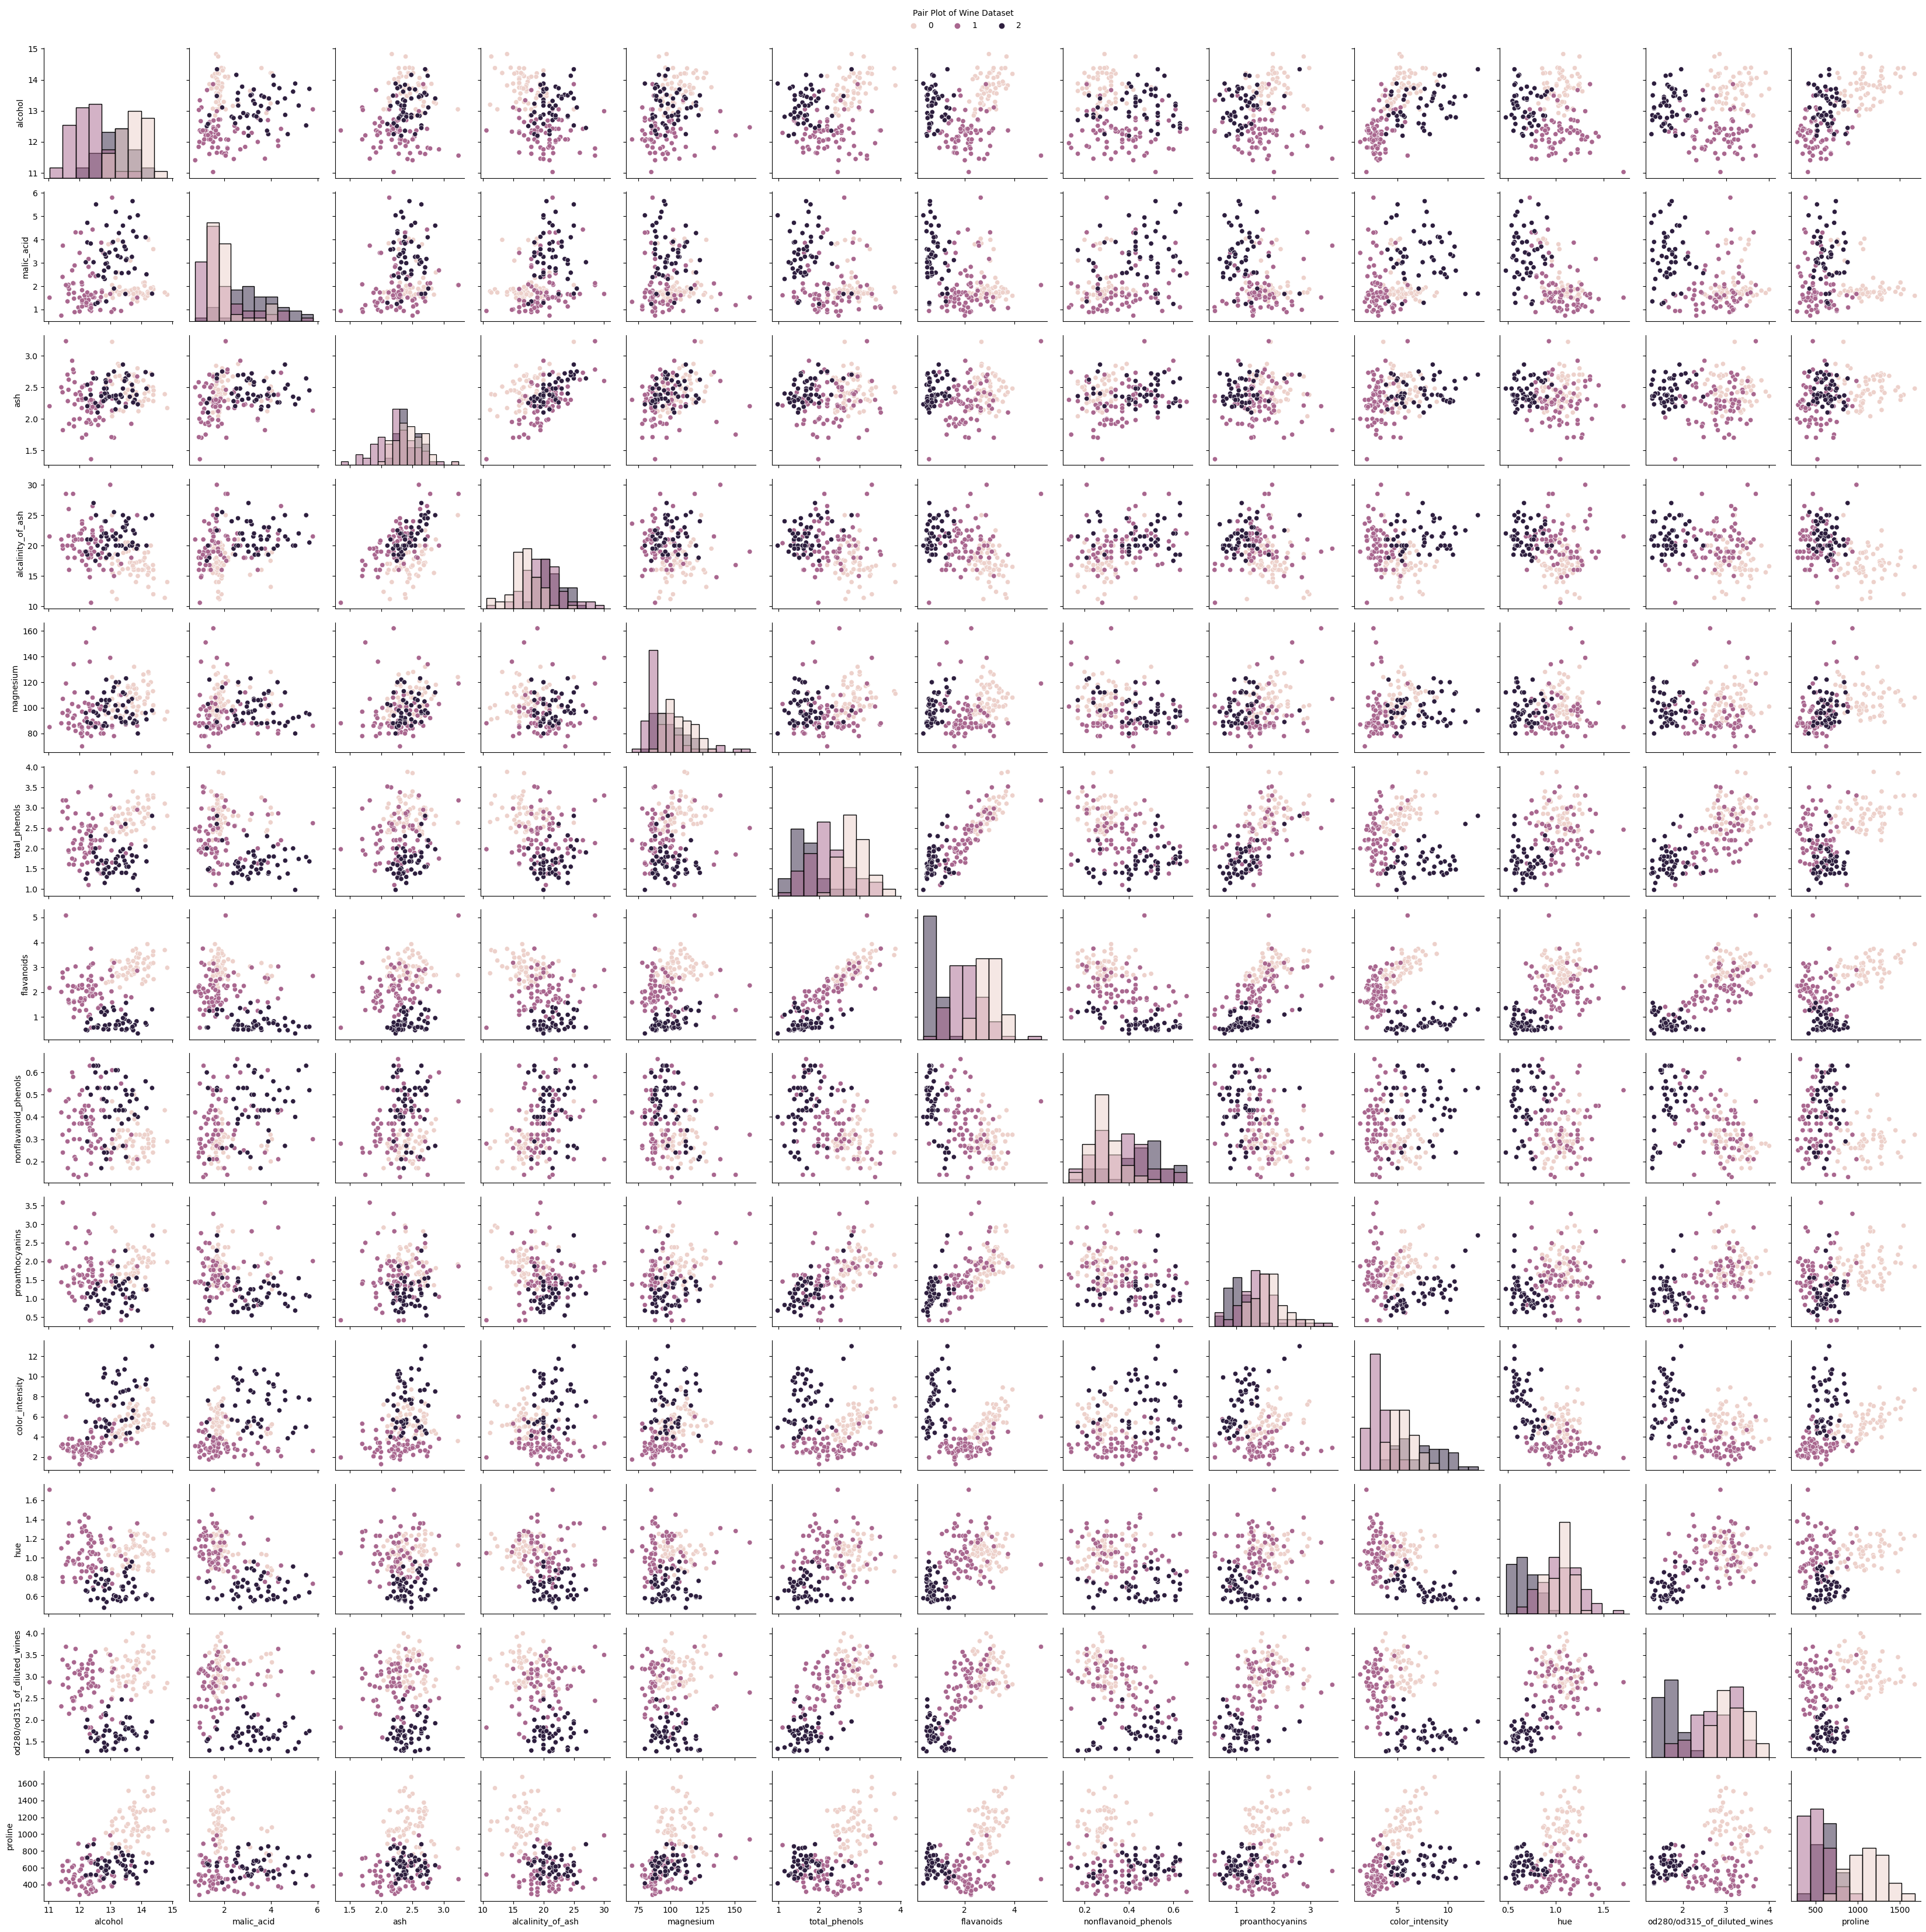

In [7]:
ax = sns.pairplot(df, hue='target', diag_kind="hist")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Pair Plot of Wine Dataset", frameon=False)

plt.tight_layout()
plt.show()

While you can see distributions and the direction of any correlation between classes by feature, it can be hard to read the data labels without zooming in, making the interpretation of the visualization more difficult.


## Histograms
Histograms show you the distributions of the different features for each category of wine.


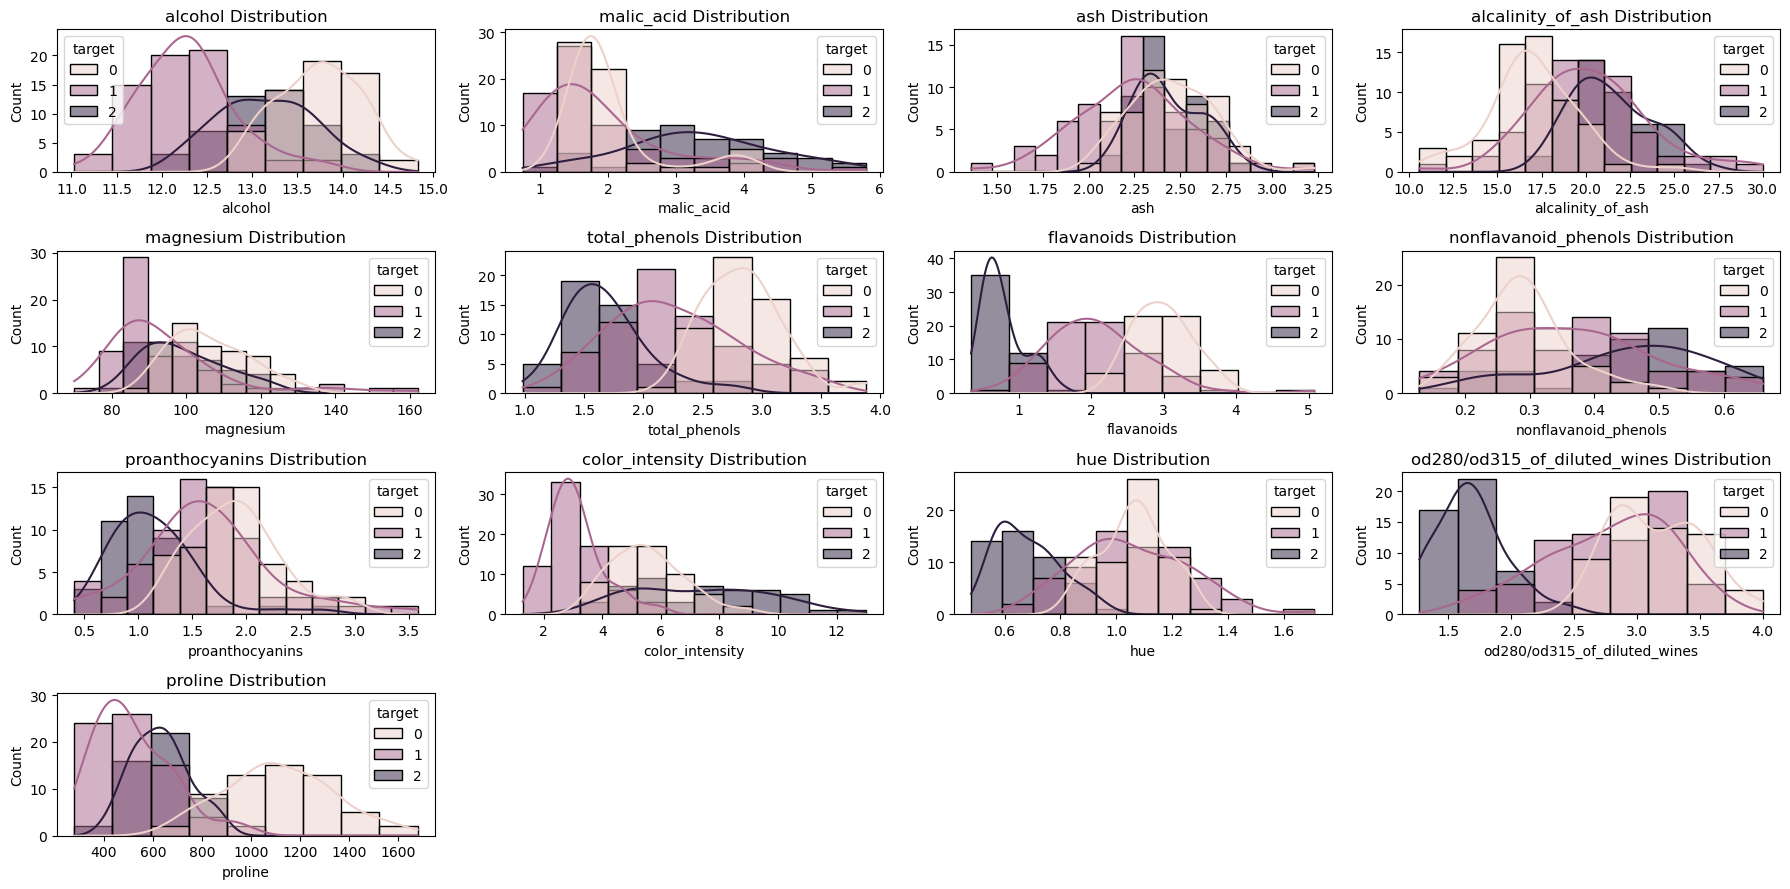

In [8]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(18, 9))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(4, 4, i + 1)
    
    #Exercise: plot histograms with sns.histplot(specify parameters => data, x, hue, kde=True) 
    #write you code here
    sns.histplot(data=df, x=feature, hue="target",kde=True)
    
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.histplot(data=df, x=feature, hue='target', kde=True)

```

</details>


Here, you can see a similar distribution of data by type for the following features: ash, alkalinity of ash, and magnesium.

## Correlation heatmaps
Correlation heatmaps might be the most helpful in identifying positive and negative correlations between attributes.


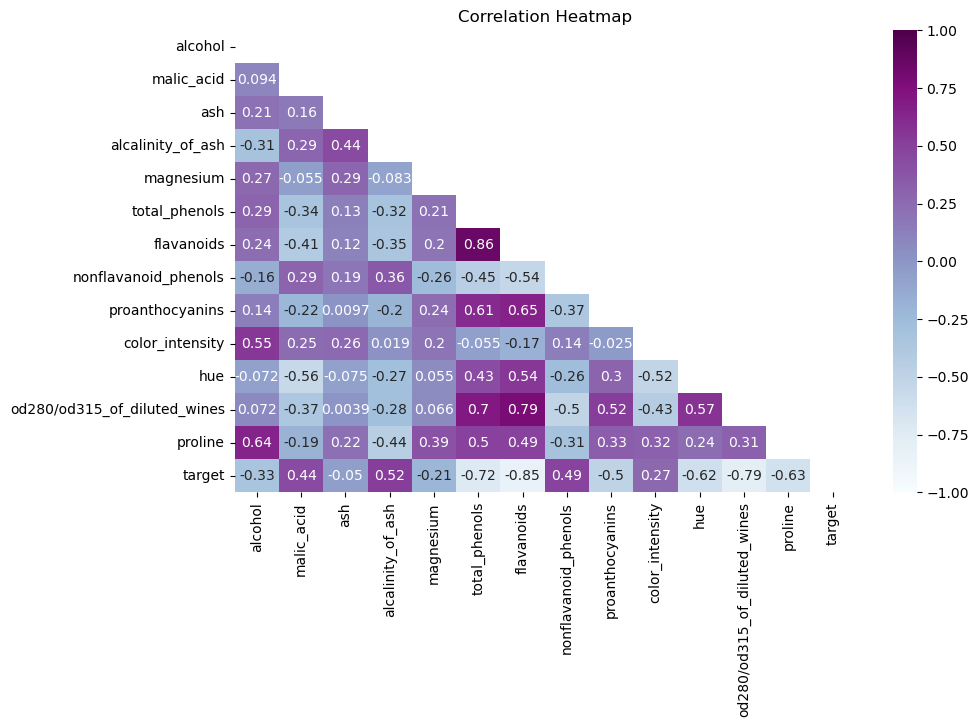

In [9]:
# Note issue with older version of seaborn: https://github.com/mwaskom/seaborn/issues/3478

corr = df.corr()
plt.figure(figsize=(10,6))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            mask=mask,  # Apply the mask to hide the upper triangle
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

Darker cells indicate positive correlation whereas light gray/white cells signal negative correlation between features. For example, you can see a high positive correlation between flavonoids and total phenols at 86%.

# Split the data set
Given the exploratory analysis, you can conclude that there are some correlated features within the data set, and that the model might benefit from PCA to reduce the number of dimensions in the data.

From here, you split the data set into two sets, a training set and the test set.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize data points through feature scaling

Next, you standardize the data by scaling and centering it to have a mean of zero and a standard deviation of one. This is a common practice when implementing PCA because this approach is affected by variables with different scales. Without this standardization, PCA might place more weight to variables with larger scales, incorrectly attributing more importance to them. To read more on the importance of feature scaling, explore the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).


In [11]:
#scaling and centering the data
sc = StandardScaler()

# Exercise: use sc and .fit_transform method to scale train and test set
X_train_scaled =     sc.fit_transform(X_train)# your code
X_test_scaled =      sc.fit_transform(X_test)# your code

<details>
    <summary>Click here for Solution</summary>

```python
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
```

</details>


# Determine the optimal value for the n_components parameter

There are a few different ways that you can determine the ideal value for the n_components parameter to apply PCA effectively. Through two popular data visualizations, you can identify the optimal number of principal components to capture the most information from the original data set.

The first data visualization is a plot of the explained variance percentage of individual components and the percentage of total variance that is captured by all principal components.


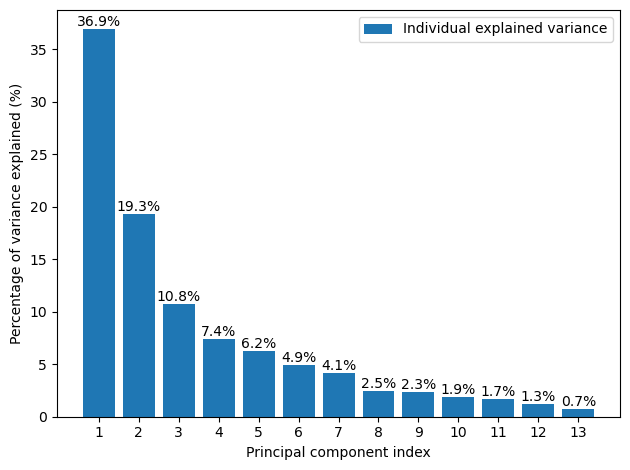

In [12]:
# calculate covariance matrix, eigenvalues and eigenvectors
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Sort the eigenvalues in descending order
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

# Adding data labels to the top of bars 
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%', 
             ha='center', va='bottom')

plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

Here, you're looking for the number of components that explain most of the variance in the data. You might want to choose the number of components that explain 80-90% of the variation to ensure that you're capturing the most information from the initial data set. By choosing five components, 83.6% of the variance would be explained from the initial data set.

The second data visualization is a scree plot.



Text(0.5, 1.0, 'Scree Plot')

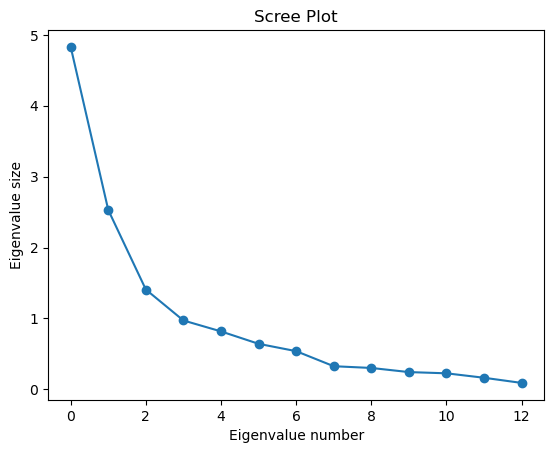

In [13]:
# generate scree plot
pca = PCA()
X_train = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

Here, you're looking for the point at which the line "elbows." The visualization here suggests that two or three principal components might be ideal.

Through some visual inspection of these two plots, you'll use two principal components, but through trial and error, you can test which number of components yields the best results as well.

# Apply PCA to the scaled training data

Now that you know the subset of components that you'll select, you can proceed with applying PCA to the data set. In this step, you are applying an orthogonal transformation to create a linear combination of the features from the original data set. While you could incorporate more principal components, two principal components capture most (56.2%) of the variance in the data set. Because this isn't the ideal 80-90% of variation that you typically look for, it's worth noting that you lose some information from the original data set.


In [16]:
# Exercise, fill the missing codes:

# Initialize PCA and set the number of components to 2 using PCA(...)
pca = PCA(n_components=2)

# Fit PCA on the scaled training data and transform it
# This reduces the dimensionality of the data to 2 principal components using .fit_transform for X_train_scaled
principalComponents = pca.fit_transform(X_train_scaled)

# Create a DataFrame from the principal components with appropriate column names
# This DataFrame now holds the reduced dimension data. use pd.DataFrame and specify principalComponents as data and name columns 'principal component 1', 'principal component 2'
pca_df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Reset the index of the PCA DataFrame
# This is useful if the original data had a different indexing and ensures alignment in concatenation
pca_df.reset_index(drop=True, inplace=True)

# Similarly, reset the index of the y_train DataFrame
# This ensures that the target variable aligns correctly with the principal components
y_train.reset_index(drop=True, inplace=True)

# Convert y_train to a DataFrame if it's not already
# This step ensures compatibility for concatenating with the PCA DataFrame
y_train = pd.DataFrame(y_train)

# Create the final PCA DataFrame
# At this point, pca_df already contains the principal components, so we use it directly
final_pca_df = pca_df

# Add the target variable to the final PCA DataFrame (final_pca_df)
# This appends the target variable as a new column, aligning it with the principal components
final_pca_df['target'] = y_train

<details>
    <summary>Click here for Solution</summary>

```python
# Initialize PCA and set the number of components to 2
pca = PCA(n_components=2)

# Fit PCA on the scaled training data and transform it
# This reduces the dimensionality of the data to 2 principal components
principalComponents = pca.fit_transform(X_train_scaled)

# Create a DataFrame from the principal components with appropriate column names
# This DataFrame now holds the reduced dimension data
pca_df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Reset the index of the PCA DataFrame
# This is useful if the original data had a different indexing and ensures alignment in concatenation
pca_df.reset_index(drop=True, inplace=True)

# Similarly, reset the index of the y_train DataFrame
# This ensures that the target variable aligns correctly with the principal components
y_train.reset_index(drop=True, inplace=True)

# Convert y_train to a DataFrame if it's not already
# This step ensures compatibility for concatenating with the PCA DataFrame
y_train = pd.DataFrame(y_train)

# Create the final PCA DataFrame
# At this point, pca_df already contains the principal components, so we use it directly
final_pca_df = pca_df

# Add the target variable to the final PCA DataFrame
# This appends the target variable as a new column, aligning it with the principal components
final_pca_df['target'] = y_train
```

</details>


# Visualize the output
You use a scatter plot to plot and visualize the principal components, which provides a 2-dimensional view of the original 13-dimensional data set.


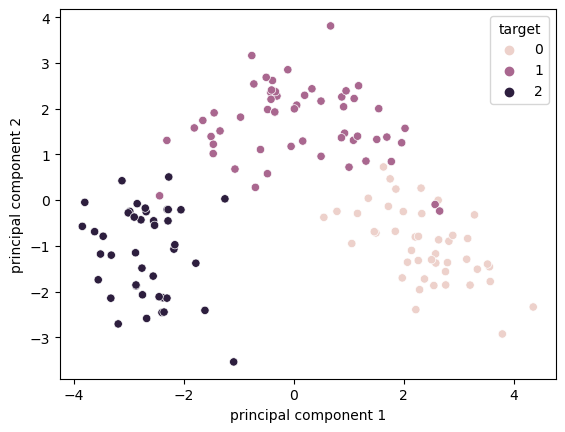

In [17]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
                        hue = 'target',
                        data=final_pca_df,
                        legend=True)
plt.show()

Here, you can also observe the class separation between the different types of wine in the data set within the projected data.


# Summary and next steps
In this tutorial, you learned how to apply PCA to reduce the dimensionality of a 13-dimensional wine data set. In future tutorials, you'll apply this technique to visualize high-dimensional data as well as to optimize performance.

Build an artificial intelligence (AI) strategy for your business on one collaborative AI and data platform called IBM [watsonx](https://www.ibm.com/watsonx?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-519&cm_sp=ibmdev-_-developer-_-product), which combines new generative AI capabilities powered by foundation models and traditional machine learning into a powerful platform spanning the AI lifecycle. With [watsonx.ai](https://www.ibm.com/products/watsonx-ai?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-519&cm_sp=ibmdev-_-developer-_-product), you can train, validate, tune, and deploy models with ease and build AI applications in a fraction of the time with a fraction of the data.

Try [watsonx.ai](https://www.ibm.com/products/watsonx-ai?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-519&cm_sp=ibmdev-_-developer-_-product), the next-generation studio for AI builders. Explore more articles and tutorials [about watsonx](https://developer.ibm.com/components/watsonx) on IBM Developer.

Also, to learn more about other supervised learning algorithms that you can apply to classification and regression problems, see these tutorials in the [Getting started with machine learning](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers) learning path:

[Tutorial: Learn classification algorithms using Python and scikit-learn](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-classification-algorithms)
[Tutorial: Learn regression algorithms using Python and scikit-learn](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-regression-algorithms)


---


# Congratulations! You have completed the lab


## Authors


Eda Kavlakoglu

<br>

Sina Nazeri   ([linkedin](https://www.linkedin.com/in/sina-nazeri))


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-01-15|0.1|Sina Nazeri|Create Lab Template|


Copyright © 2023 IBM Corporation. All rights reserved.
